**Task 3: Clustering Analysis – Customer Segmentation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data=pd.read_csv("customer_data.csv")

In [3]:
customer_data.head()

,Customer ID,Age,Annual Income,Spending Score
0,CUST0001,56,73053,58
1,CUST0002,69,36959,67
2,CUST0003,46,20530,46
3,CUST0004,32,109856,24
4,CUST0005,60,18748,32


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
customer_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


**Data preprocessing**

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
numerical_columns = ["Age", "Annual Income", "Spending Score"]

In [8]:
# Using StandardScaler
standard_scaler = StandardScaler()
customer_data_standardized = customer_data.copy()
customer_data_standardized[numerical_columns] = standard_scaler.fit_transform(customer_data[numerical_columns])

In [14]:
customer_data_standardized[numerical_columns]

,Age,Annual Income,Spending Score
0,0.843704,0.239901,0.287734
1,1.715924,-0.950263,0.596756
2,0.172767,-1.491993,-0.124296
3,-0.766547,1.453443,-0.879683
4,1.112080,-1.550752,-0.604996
...,...,...,...
195,1.715924,1.138805,-0.467653
196,-0.900734,-0.795879,-1.360383
197,0.977892,-0.533966,0.802770
198,-1.571672,-0.594605,-0.879683


In [10]:
# Using MinMaxScaler
minmax_scaler = MinMaxScaler()
customer_data_minmax_scaled = customer_data.copy()
customer_data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(customer_data[numerical_columns])

In [15]:
customer_data_minmax_scaled[numerical_columns]

,Age,Annual Income,Spending Score
0,0.745098,0.556410,0.575758
1,1.000000,0.208663,0.666667
2,0.549020,0.050379,0.454545
3,0.274510,0.910987,0.232323
4,0.823529,0.033210,0.313131
...,...,...,...
195,1.000000,0.819055,0.353535
196,0.235294,0.253772,0.090909
197,0.784314,0.330298,0.727273
198,0.039216,0.312581,0.232323


**Clustering**

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Elbow Method: Calculate WCSS for different numbers of clusters
wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_standardized[numerical_columns])
    wcss.append(kmeans.inertia_)

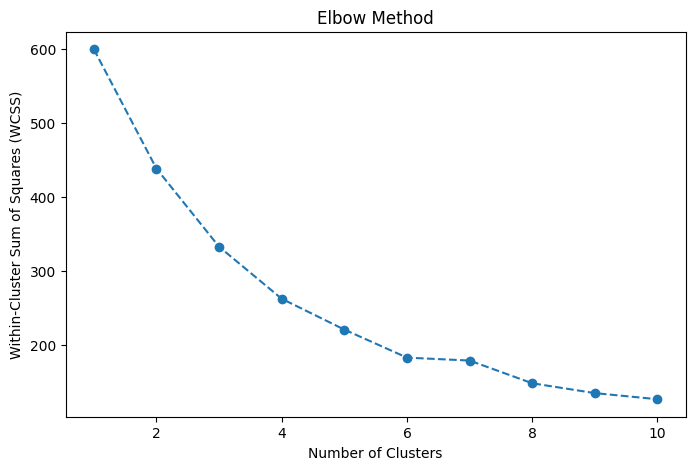

In [17]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker="o", linestyle="--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

In [18]:
# Silhouette Score: Calculate for different numbers of clusters
silhouette_scores = []

for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_standardized[numerical_columns])
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(customer_data_standardized[numerical_columns], labels))

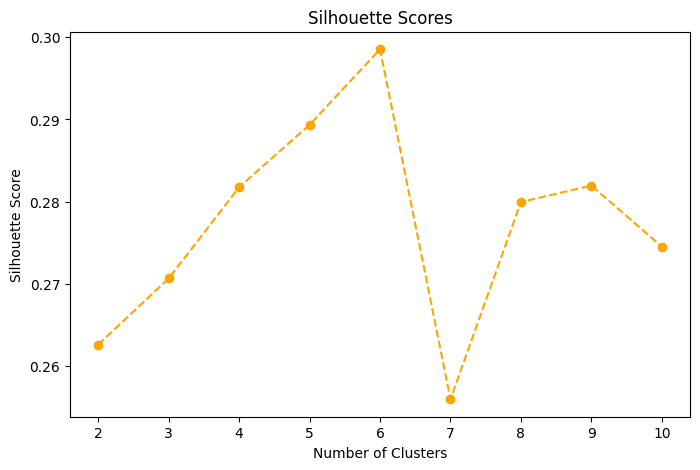

In [19]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="--", color="orange")
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [20]:
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {optimal_k}")

The optimal number of clusters based on Silhouette Score is: 6


In [21]:
optimal_k=6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(customer_data_standardized[numerical_columns])


In [22]:
output_file_path = "customer_data_with_clusters.csv"
customer_data.to_csv(output_file_path, index=False)

In [23]:
print(customer_data.head())

  Customer ID  Age  Annual Income  Spending Score  Cluster
0    CUST0001   56          73053              58        3
1    CUST0002   69          36959              67        1
2    CUST0003   46          20530              46        1
3    CUST0004   32         109856              24        0
4    CUST0005   60          18748              32        1


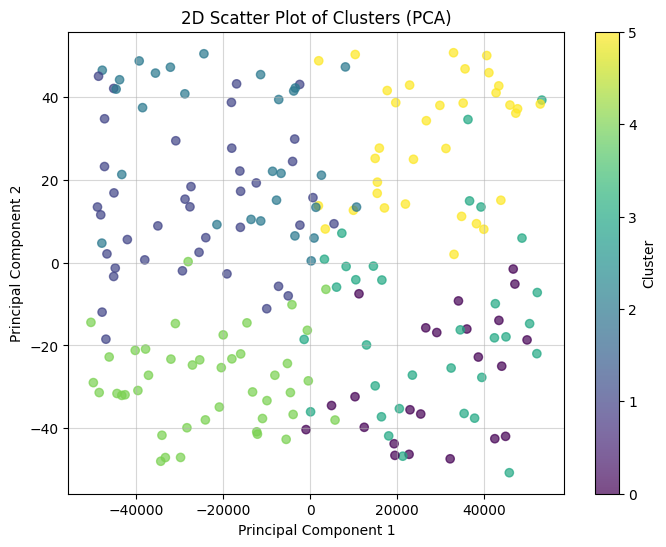

In [24]:
from sklearn.decomposition import PCA

clusters = customer_data["Cluster"]

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(customer_data[numerical_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.title("2D Scatter Plot of Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.5)
plt.show()